# Introduction to Natural Language Processing in Python

https://learn.datacamp.com/courses/introduction-to-natural-language-processing-in-python

## Pre-reqs

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from collections import Counter, defaultdict
import glob
import itertools

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

import spacy

!pip install polyglot
!pip install pyicu
!pip install -U pycld2
!pip install morfessor
from polyglot.text import Text
!polyglot download embeddings2.fr
!polyglot download ner2.fr
!polyglot download embeddings2.es
!polyglot download ner2.es

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
Requirement already up-to-date: pycld2 in /usr/local/lib/python3.6/dist-packages (0.41)
[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Pa

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_data = '/content/drive/My Drive/Data Science/DataCamp/Datasets/'

### Loading Text Files

In [4]:
scene_one = pd.read_csv(path_data+'scene_one.txt', sep='\n', header=None)
scene_one = str(scene_one[0].values[0]).replace("\\n", "\n")

holy_grail = pd.read_csv(path_data+'grail.txt', sep='NONE', header=None)
holy_grail = " \n".join(holy_grail[0].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [5]:
article = pd.read_csv(path_data+'Wikipedia articles/wiki_text_debugging.txt', sep='NONE', header=None)
article = " \n".join(article[0].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
articles = [pd.read_csv(filename, sep='NONE', header=None) for filename in glob.glob(path_data+'Wikipedia articles/*.txt')]
articles = [" \n".join(article[0].values) for article in articles]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
news = [pd.read_csv(filename, sep='NONE', header=None) for filename in glob.glob(path_data+'News articles/*.txt')]
news = [" \n".join(n[0].values) for n in news]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


### Loading CSV Files

In [8]:
fake_or_real_news = pd.read_csv(path_data+'fake_or_real_news.csv')

## 1) Regular expressions & word tokenization

### Introduction to regular expressions

**Practicing regular expressions: re.split() and re.findall()**

In [9]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so. Can you find 4 sentences?  Or perhaps, all 19 words?"

In [10]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', ' Can you find 4 sentences', '  Or perhaps, all 19 words', '']


In [11]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['Let', 'RegEx', 'Won', 'Can', 'Or']


In [12]:
# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']


In [13]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

['4', '19']


### Introduction to tokenization

**Word tokenization with NLTK**

In [14]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)
sentences[:5]

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!']

In [15]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
tokenized_sent[:9]

['ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son']

In [16]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'that', 'fly', 'Am', ']', 'son', 'coconuts', 'Will', '[', 'I', 'SCENE', 'use', '#', 'by', 'clop', "'re", 'forty-three', 'bird', 'kingdom', 'beat', 'of', 'velocity', 'anyway', 'weight', 'five', 'Wait', 'seek', 'strangers', 'using', 'A', 'held', 'the', 'join', "'d", 'found', 'have', 'then', 'The', 'dorsal', 'That', 'they', 'coconut', 'breadth', 'air-speed', 'tell', 'swallows', 'why', 'be', 'Are', 'Listen', "'", 'Court', 'got', 'get', 'speak', 'your', 'So', 'second', "'s", 'two', 'does', 'and', 'defeator', 'every', '?', 'mean', 'husk', 'non-migratory', 'feathers', 'me', 'warmer', 'agree', '!', 'Found', 'ask', 'climes', '2', 'one', 'on', 'SOLDIER', 'sovereign', 'are', 'point', 'line', 'from', 'bangin', 'simple', 'am', 'halves', "'em", 'under', 'go', 'carrying', 'covered', 'my', 'matter', 'a', 'Oh', 'needs', '.', 'an', 'master', 'grip', 'ratios', 'court', 'with', 'this', 'creeper', 'right', 'carry', 'since', 'or', 'But', 'maybe', 'In', 'maintain', 'you', 'but', 'martin', 'Pendragon', 'stra

**More regex with re.search()**

In [17]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


### Advanced tokenization with NLTK and regex

**Regex with NLTK tokenization**

In [18]:
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']

In [19]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [20]:
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([#@]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [21]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


**Non-ascii tokenization**

In [22]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [23]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [24]:
# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [25]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


### Charting word length with NLTK

**Charting practice**

In [26]:
holy_grail

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there? \nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England! \nSOLDIER #1: Pull the other one! \nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master. \nSOLDIER #1: What?  Ridden on a horse? \nARTHUR: Yes! \nSOLDIER #1: You're using coconuts! \nARTHUR: What? \nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together. \nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through-- \nSOLDIER #1: Where'd you get the coconuts? \nARTHUR: We found them. \nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical! \nARTHUR: What do you mean? \nSOLDIER #1: Wel

In [27]:
# Split the script into lines: lines
lines = holy_grail.split('\n')
lines[:3]

['SCENE 1: [wind] [clop clop clop] ',
 'KING ARTHUR: Whoa there!  [clop clop clop] ',
 'SOLDIER #1: Halt!  Who goes there? ']

In [28]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]
lines[:3]

['SCENE 1: [wind] [clop clop clop] ',
 ' Whoa there!  [clop clop clop] ',
 ' Halt!  Who goes there? ']

In [29]:
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]
tokenized_lines[:3]

[['SCENE', '1', 'wind', 'clop', 'clop', 'clop'],
 ['Whoa', 'there', 'clop', 'clop', 'clop'],
 ['Halt', 'Who', 'goes', 'there']]

In [30]:
# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
line_num_words[:3]

[6, 5, 4]

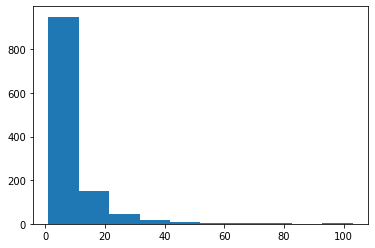

In [31]:
# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

## 2) Simple topic identification

### Word counts with bag-of-words

In [32]:
article

'\'\'\'Debugging\'\'\' is the process of finding and resolving of defects that prevent correct operation of computer software or a system. \nNumerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes. \nOrigin \nA computer log entry from the Mark&nbsp;II, with a moth taped to the page \nThe terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operation, w

In [33]:
# Tokenize the article: tokens
tokens = word_tokenize(article)
tokens[:9]

["'", "''", 'Debugging', "''", "'", 'is', 'the', 'process', 'of']

In [34]:
# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]
lower_tokens[:9]

["'", "''", 'debugging', "''", "'", 'is', 'the', 'process', 'of']

In [35]:
# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)
bow_simple.items()

dict_items([("'", 3), ("''", 68), ('debugging', 40), ('is', 25), ('the', 150), ('process', 12), ('of', 81), ('finding', 1), ('and', 41), ('resolving', 1), ('defects', 1), ('that', 14), ('prevent', 1), ('correct', 1), ('operation', 2), ('computer', 12), ('software', 16), ('or', 25), ('a', 60), ('system', 19), ('.', 89), ('numerous', 2), ('books', 1), ('have', 7), ('been', 3), ('written', 1), ('about', 3), ('(', 40), ('see', 5), ('below', 1), (':', 31), ('#', 1), ('further', 1), ('reading|further', 1), ('reading', 1), (')', 40), (',', 151), ('as', 21), ('it', 18), ('involves', 1), ('aspects', 1), ('including', 1), ('interactive', 2), ('control', 4), ('flow', 2), ('integration', 1), ('testing', 4), ('logfile|log', 1), ('files', 1), ('monitoring', 1), ('application', 2), ('monitoring|application', 1), ('monitoring|system', 1), ('memory', 5), ('dumps', 1), ('profiling', 1), ('programming', 9), ('|profiling', 1), ('statistical', 1), ('special', 2), ('design', 3), ('tactics', 1), ('to', 63), 

In [36]:
# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 68), ('to', 63), ('a', 60), ('in', 44), ('and', 41), ('debugging', 40)]


### Simple text preprocessing

**Text preprocessing practice**

In [37]:
english_stops = nltk.corpus.stopwords.words('english')
english_stops[:9]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you']

In [38]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]
alpha_only[:5]

['debugging', 'is', 'the', 'process', 'of']

In [39]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]
no_stops[:5]

['debugging', 'process', 'finding', 'resolving', 'defects']

In [40]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
lemmatized[:5]

['debugging', 'process', 'finding', 'resolving', 'defect']

In [41]:
# Create the bag-of-words: bow
bow = Counter(lemmatized)
bow.items()

dict_items([('debugging', 40), ('process', 13), ('finding', 1), ('resolving', 1), ('defect', 2), ('prevent', 1), ('correct', 1), ('operation', 2), ('computer', 14), ('software', 16), ('system', 25), ('numerous', 2), ('book', 2), ('written', 1), ('see', 5), ('reading', 1), ('involves', 1), ('aspect', 1), ('including', 1), ('interactive', 2), ('control', 4), ('flow', 2), ('integration', 1), ('testing', 4), ('file', 3), ('monitoring', 1), ('application', 2), ('memory', 5), ('dump', 4), ('profiling', 1), ('programming', 9), ('statistical', 1), ('special', 2), ('design', 4), ('tactic', 1), ('improve', 1), ('detection', 2), ('simplifying', 1), ('change', 5), ('origin', 2), ('log', 1), ('entry', 2), ('mark', 3), ('nbsp', 2), ('ii', 2), ('moth', 3), ('taped', 1), ('page', 2), ('term', 13), ('bug', 16), ('popularly', 1), ('attributed', 1), ('admiral', 1), ('grace', 3), ('hopper', 4), ('http', 11), ('foldoc', 1), ('working', 1), ('harvard', 2), ('university', 1), ('associate', 1), ('discovered',

In [42]:
# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 40), ('system', 25), ('software', 16), ('bug', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('used', 12)]


### Introduction to gensim

**Creating and querying a corpus with gensim**

In [43]:
articles[:3]

['In computer science, a \'\'\'high-level programming language\'\'\' is a programming language with strong Abstraction (computer science)|abstraction from the details of the computer. In comparison to low-level programming languages, it may use natural language elements, be easier to use, or may automate (or even hide entirely) significant areas of computing systems (e.g. memory management), making the process of developing a program simpler and more understandable relative to a lower-level language. The amount of abstraction provided defines how "high-level" a programming language is.[https://web.archive.org/web/20070826224349/http://www.ittc.ku.edu/hybridthreads/glossary/index.php HThreads - RD Glossary<!-- Bot generated title -->] \nIn the 1960s, high-level programming languages using a compiler were commonly called \'\'\'autocodes\'\'\'.<ref name=kleith>{{cite book|last=London|first=Keith|title=Introduction to Computers|year=1968|publisher=Faber and Faber Limited|location=24 Russel

In [44]:
# preprocessing
# - lowercasing all words,
# - tokenizing them,
# removing stop words and punctuation

articles = [article.lower() for article in articles]
articles = [word_tokenize(article) for article in articles]

# articles = [list(set([token for token in word_tokenize(articles.lower()) \
#                      if token.isalpha() and token not in english_stops]))]

In [45]:
articles_clean = []
for article in articles:
  articles_clean.append([token for token in article if token.isalpha() and token not in english_stops])
# articles = [article for article in articles for token in article if token.isalpha() and token not in english_stops]

In [46]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles_clean)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

computer


In [47]:
# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles_clean]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4])

[(1, 1), (3, 3), (5, 4), (15, 3), (17, 1), (18, 11), (20, 2), (21, 4), (25, 3), (28, 1), (29, 1), (30, 2), (33, 1), (34, 4), (37, 1), (41, 8), (45, 2), (47, 1), (49, 5), (54, 10), (58, 6), (59, 1), (60, 1), (62, 1), (63, 3), (65, 5), (66, 3), (68, 7), (71, 26), (72, 4), (73, 1), (75, 15), (80, 5), (81, 1), (85, 1), (86, 3), (93, 1), (96, 22), (97, 2), (98, 4), (99, 2), (100, 4), (102, 2), (105, 2), (108, 1), (111, 3), (113, 4), (116, 4), (117, 1), (119, 9), (122, 1), (125, 1), (132, 1), (133, 1), (135, 1), (137, 8), (139, 5), (147, 1), (156, 3), (157, 1), (158, 2), (159, 91), (161, 1), (162, 2), (165, 6), (167, 8), (168, 2), (174, 1), (184, 4), (186, 2), (187, 2), (188, 2), (192, 5), (193, 1), (194, 4), (200, 3), (202, 7), (204, 1), (207, 1), (208, 3), (212, 7), (215, 1), (216, 1), (217, 1), (222, 2), (224, 17), (225, 1), (226, 2), (227, 2), (229, 3), (230, 2), (233, 2), (234, 1), (235, 1), (236, 1), (237, 3), (239, 3), (247, 1), (249, 1), (254, 1), (257, 1), (259, 5), (261, 3), (266, 

**Gensim bag-of-words**

In [48]:
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

engineering 91
reverse 71
software 51
cite 26
computer 22


**Tf-idf with Wikipedia**

In [49]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

[(1, 0.007564368860979428), (3, 0.0037660624802480854), (5, 0.024111758165856204), (15, 0.0037660624802480854), (17, 0.0027917834795980713)]


## 3) Named-entity recognition

### Named Entity Recognition

**NER with NLTK**

In [50]:
article = news[0]
article

'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company. \nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hir

In [51]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)
sentences[:3]

['The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character.',
 'If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic.',
 'Uber wanted to know as much as possible about the people who use its service, and those who don’t.']

In [52]:
# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]
token_sentences[0][:5]

['The', 'taxi-hailing', 'company', 'Uber', 'brings']

In [53]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 
pos_sentences[0][:5]

[('The', 'DT'),
 ('taxi-hailing', 'JJ'),
 ('company', 'NN'),
 ('Uber', 'NNP'),
 ('brings', 'VBZ')]

In [54]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


**Charting practice**

In [55]:
articles = " ".join(news)
articles

'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company. \nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hir

In [56]:
sentences = sent_tokenize(articles)
token_sentences = [word_tokenize(sent) for sent in sentences]
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)

In [57]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1

In [58]:
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())
labels

['GPE', 'PERSON', 'ORGANIZATION', 'GSP', 'LOCATION', 'FACILITY']

In [59]:
# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]
values

[226, 224, 90, 4, 1, 1]

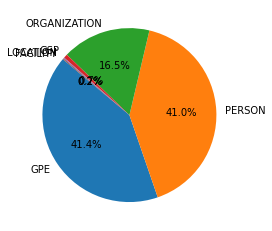

In [60]:
# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### Introduction to SpaCy

**Comparing NLTK with spaCy NER**

In [61]:
article

'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company. \nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hir

In [62]:
# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parse=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
PERSON Uber
ORG unroll.me
ORG Apple
PERSON Uber
PERSON Travis Kalanick
PERSON Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


### Multilingual NER with polyglot

**French NER with polyglot I**

In [63]:
article = news[1]
article

"édition abonné \nDans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu. \nLe Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles) \nTRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs supplémentaires. Il est vrai que l’intelligence artificielle (IA) est bien en peine de reconnaître des contenus violents, surtout diffusés en direct. \nLe quotidien affreux de ces modérateurs, contraints de visionner des horreurs à longueur de journée, mériterait pourtant qu’on les remplace vite par des machines ! \nL’IA ne peut pas tout, mais là où elle peut beaucoup, on la maudit, accusée de détruire nos emplois, de remplacer la convivialité humaine. Ce débat repose sur un malentendu. \nIl vient d

In [64]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


**French NER with polyglot II**

In [65]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


**Spanish NER with polyglot**

In [66]:
article = "-Lina del Castillo es profesora en el Instituto de Estudios Latinoamericanos Teresa Lozano Long (LLILAS) y el Departamento de Historia de la Universidad de Texas en Austin. Ella será la moderadora del panel “Los Mundos Políticos de Gabriel García Márquez” este viernes, Oct. 30, en el simposio Gabriel García Márquez: Vida y Legado.\
LIna del Castillo\
Actualmente, sus investigaciones abarcan la intersección de cartografía, disputas a las demandas de tierra y recursos, y la formación del n...el tren de medianoche que lleva a miles y miles de cadáveres uno encima del otro como tantos racimos del banano que acabarán tirados al mar. Ningún recuento periodístico podría provocar nuestra imaginación y nuestra memoria como este relato de García Márquez.\
Contenido Relacionado\
Lea más artículos sobre el archivo de Gabriel García Márquez\
Reciba mensualmente las últimas noticias e información del Harry Ransom Center con eNews, nuestro correo electrónico mensual. ¡Suscríbase hoy!"

In [67]:
txt = Text(article)

In [68]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    print(ent)
    if "Márquez" in ent or "Gabo" in ent:
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)

['Lina']
['Castillo']
['Teresa', 'Lozano', 'Long']
['Universidad', 'de', 'Texas']
['Austin']
['Austin', '.']
['Austin', '.', 'Ella']
['Gabriel', 'García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['García', 'Márquez.Contenido']
['Gabriel', 'García', 'MárquezReciba']
['Harry', 'Ransom']
['Harry', 'Ransom', 'Center']
2
0.15384615384615385


## 4) Building a "fake news" classifier

### Building word count vectors with scikit-learn

In [69]:
df = fake_or_real_news.copy()
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [70]:
# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

**CountVectorizer for text classification**

In [71]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


**TfidfVectorizer for text classification**

In [72]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [73]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Inspecting the vectors**

In [74]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

   00  000  0000  00000031  000035  00006  ...  ما  محاولات  من  هذا  والمرضى  ยงade
0   0    0     0         0       0      0  ...   0        0   0    0        0      0
1   0    0     0         0       0      0  ...   0        0   0    0        0      0
2   0    0     0         0       0      0  ...   0        0   0    0        0      0
3   0    0     0         0       0      0  ...   0        0   0    0        0      0
4   0    0     0         0       0      0  ...   0        0   0    0        0      0

[5 rows x 56922 columns]


In [75]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of tfidf_df
print(tfidf_df.head())

    00  000  0000  00000031  000035  ...  محاولات   من  هذا  والمرضى  ยงade
0  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
1  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
2  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
3  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
4  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0

[5 rows x 56922 columns]


In [76]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [77]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


### Training and testing a classification model with scikit-learn

**Training and testing the "fake news" model with CountVectorizer**

In [78]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.893352462936394
[[ 865  143]
 [  80 1003]]


**Training and testing the "fake news" model with TfidfVectorizer**

In [79]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.8565279770444764
[[ 739  269]
 [  31 1052]]


### Simple NLP, complex problems

**Improving your model**

In [80]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



**Inspecting your model**

In [81]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.316312804238807, '0000'), (-11.316312804238807, '000035'), (-11.316312804238807, '0001'), (-11.316312804238807, '0001pt'), (-11.316312804238807, '000km'), (-11.316312804238807, '0011'), (-11.316312804238807, '006s'), (-11.316312804238807, '007'), (-11.316312804238807, '007s'), (-11.316312804238807, '008s'), (-11.316312804238807, '0099'), (-11.316312804238807, '00am'), (-11.316312804238807, '00p'), (-11.316312804238807, '00pm'), (-11.316312804238807, '014'), (-11.316312804238807, '015'), (-11.316312804238807, '018'), (-11.316312804238807, '01am'), (-11.316312804238807, '020'), (-11.316312804238807, '023')]
REAL [(-7.742481952533027, 'states'), (-7.717550034444668, 'rubio'), (-7.703583809227384, 'voters'), (-7.654774992495461, 'house'), (-7.649398936153309, 'republicans'), (-7.6246184189367, 'bush'), (-7.616556675728881, 'percent'), (-7.545789237823644, 'people'), (-7.516447881078008, 'new'), (-7.448027933291952, 'party'), (-7.411148410203476, 'cruz'), (-7.410910239085596, 'st